## Model Selection & Ensemble Learning: Advanced Techniques

### 1. Model Selection: Finding the Optimal Fit

**1.1 The Challenge of Choice**

In machine learning, we're often faced with a plethora of algorithms, each with its own strengths and weaknesses. Model selection is the process of navigating this landscape to identify the algorithm that best suits our data and problem.

**1.2 The Importance of Generalization**

Our primary goal isn't to create a model that memorizes the training data but one that generalizes well to unseen examples. This is where model selection becomes crucial.

**1.3 Evaluation Metrics: Our Compass**

To compare models, we need objective metrics. These metrics act as our compass, guiding us toward the model that aligns with our objectives.

* **Accuracy:** A simple measure of correct predictions, but can be misleading in imbalanced datasets.
* **Precision:** The ability to avoid false positives.
* **Recall:** The ability to capture all positive instances.
* **F1-score:** A harmonic mean of precision and recall.
* **ROC-AUC:** A measure of a classifier's ability to distinguish between classes, especially useful in imbalanced datasets.

**1.4 Cross-Validation: Simulating Real-World Scenarios**

Cross-validation is a technique that simulates how our model will perform on unseen data. It involves partitioning the data into multiple folds, training on some folds, and validating on others, providing a more robust estimate of performance.

**1.5 Code Example: Model Selection with Iris**

```python
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Add noise to the features
noise = np.random.normal(0, 0.5, X.shape)  # Increased noise
X_noisy = X + noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the candidate models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
}

# Evaluate the models using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
    results[name] = scores
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")

# Select the best model (based on mean cross-validation accuracy)
best_model_name = max(results, key=lambda k: np.mean(results[k]))
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")

# Train the best model on the entire training set
best_model.fit(X_train_scaled, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Add noise to the features
noise = np.random.normal(0, 0.5, X.shape)  # Increased noise
X_noisy = X + noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the candidate models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
}

# Evaluate the models using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
    results[name] = scores
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")

# Select the best model (based on mean cross-validation accuracy)
best_model_name = max(results, key=lambda k: np.mean(results[k]))
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")

# Train the best model on the entire training set
best_model.fit(X_train_scaled, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Logistic Regression: Mean Accuracy = 0.8917, Std Dev = 0.0333
Decision Tree: Mean Accuracy = 0.9083, Std Dev = 0.0408
Random Forest: Mean Accuracy = 0.9250, Std Dev = 0.0553
SVM: Mean Accuracy = 0.9083, Std Dev = 0.0486

Best Model: Random Forest

Test Set Evaluation:
Accuracy: 0.9667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### 2. Ensemble Learning: The Wisdom of Crowds

**2.1 The Power of Diversity**

Ensemble methods are based on the principle that combining multiple models can lead to better performance than any single model. This "wisdom of crowds" approach is particularly effective when the individual models are diverse.

**2.2 Bagging: Parallel Training for Reduced Variance**

Bagging (Bootstrap Aggregating) involves training multiple models independently on different subsets of the training data, created by random sampling with replacement (bootstrapping). The final prediction is then obtained by averaging (for regression) or voting (for classification).

* **Random Forests:** A popular bagging technique that combines multiple decision trees. Each tree is trained on a random subset of the data and a random subset of the features.

**2.3 Boosting: Sequential Training for Reduced Bias**

Boosting involves training models sequentially, with each subsequent model focusing on the mistakes made by the previous models. This adaptive approach aims to reduce bias and improve overall accuracy.

* **AdaBoost (Adaptive Boosting):** Assigns weights to training examples, with higher weights given to misclassified examples.
* **Gradient Boosting:** Builds trees sequentially, with each tree correcting the errors of the previous trees by minimizing a loss function.
* **XGBoost, LightGBM, CatBoost:** Optimized implementations of gradient boosting that offer improved speed and performance.

**2.4 Stacking: Combining Predictions with a Meta-Learner**

Stacking involves training multiple base models and then training a meta-learner to combine their predictions. The meta-learner learns how to best weigh the predictions of the base models.

**2.5 Code Example: Ensemble Methods with Iris (Noise Added)**

```python
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression  # For stacking
from sklearn.ensemble import StackingClassifier

# Define ensemble models
ensemble_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# Evaluate ensemble models
ensemble_results = {}
for name, model in ensemble_models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
    ensemble_results[name] = scores
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")

# Example of Stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42))
]
meta_learner = LogisticRegression()  # Use Logistic Regression as meta-learner
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

stacking_scores = cross_val_score(stacking_model, X_train_scaled, y_train, cv=5, scoring="accuracy")
print(f"Stacking: Mean Accuracy = {np.mean(stacking_scores):.4f}, Std Dev = {np.std(stacking_scores):.4f}")

# Train and evaluate the best ensemble model (e.g., Random Forest)
best_ensemble_name = max(ensemble_results, key=lambda k: np.mean(ensemble_results[k]))
best_ensemble = ensemble_models[best_ensemble_name]

best_ensemble.fit(X_train_scaled, y_train)

y_pred_ensemble = best_ensemble.predict(X_test_scaled)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
report_ensemble = classification_report(y_test, y_pred_ensemble)

print("\nBest Ensemble Model Test Set Evaluation:")
print(f"Accuracy: {accuracy_ensemble:.4f}")
print("Classification Report:\n", report_ensemble)

In [8]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression  # For stacking
from sklearn.ensemble import StackingClassifier

# Define ensemble models
ensemble_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# Evaluate ensemble models
ensemble_results = {}
for name, model in ensemble_models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
    ensemble_results[name] = scores
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")

# Example of Stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42))
]
meta_learner = LogisticRegression()  # Use Logistic Regression as meta-learner
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

stacking_scores = cross_val_score(stacking_model, X_train_scaled, y_train, cv=5, scoring="accuracy")
print(f"Stacking: Mean Accuracy = {np.mean(stacking_scores):.4f}, Std Dev = {np.std(stacking_scores):.4f}")

# Train and evaluate the best ensemble model (e.g., Random Forest)
best_ensemble_name = max(ensemble_results, key=lambda k: np.mean(ensemble_results[k]))
best_ensemble = ensemble_models[best_ensemble_name]

best_ensemble.fit(X_train_scaled, y_train)

y_pred_ensemble = best_ensemble.predict(X_test_scaled)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
report_ensemble = classification_report(y_test, y_pred_ensemble)

print("\nBest Ensemble Model Test Set Evaluation:")
print(f"Accuracy: {accuracy_ensemble:.4f}")
print("Classification Report:\n", report_ensemble)

Random Forest: Mean Accuracy = 0.9250, Std Dev = 0.0553
AdaBoost: Mean Accuracy = 0.8750, Std Dev = 0.0697
Gradient Boosting: Mean Accuracy = 0.9083, Std Dev = 0.0486
Stacking: Mean Accuracy = 0.9000, Std Dev = 0.0565

Best Ensemble Model Test Set Evaluation:
Accuracy: 0.9667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### 3. Analyzing and Interpreting Results

**3.1 Feature Importance**

Ensemble methods, particularly Random Forests and Gradient Boosting, provide feature importance scores, which indicate the relative importance of each feature in the model's predictions. This can be invaluable for feature selection and understanding the underlying data.

**3.2 Confusion Matrix and Detailed Metrics**

A confusion matrix provides a detailed breakdown of the model's predictions, showing the number of true positives, true negatives, false positives, and false negatives. This is essential for understanding the model's performance on different classes, especially in imbalanced datasets.

**3.3 ROC-AUC and Precision-Recall Curves**

For binary classification problems, ROC-AUC and precision-recall curves provide a comprehensive view of the model's performance across different thresholds. These curves are particularly useful when dealing with imbalanced datasets or when the costs of false positives and false negatives are different.

**3.4 Interpreting Model Complexity**

Ensemble methods can be complex, and it's essential to understand their complexity to avoid overfitting. Techniques like visualizing decision trees in Random Forests or analyzing feature importance scores can help in interpreting the model.

**3.5 Code Example: Analysis and Interpretation**

```python
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC (for binary classification - adapt for multi-class if needed)
if len(np.unique(y)) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, best_ensemble.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# Feature Importance (Random Forest example)
if best_ensemble_name == "Random Forest":
    feature_importance = best_ensemble.feature_importances_
    plt.figure()
    plt.bar(iris.feature_names, feature_importance)
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()

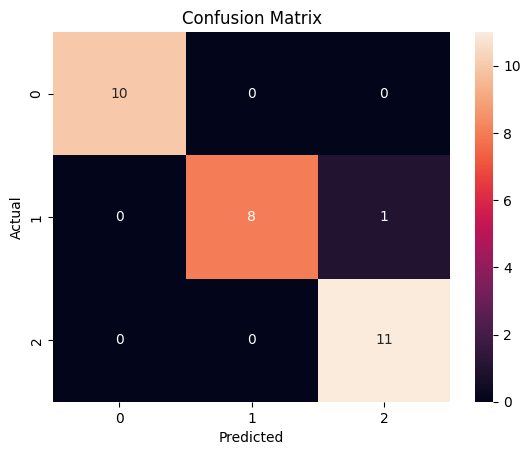

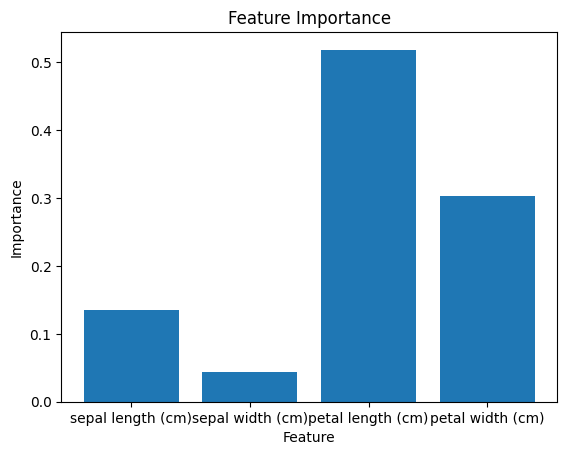

In [9]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC (for binary classification - adapt for multi-class if needed)
if len(np.unique(y)) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, best_ensemble.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# Feature Importance (Random Forest example)
if best_ensemble_name == "Random Forest":
    feature_importance = best_ensemble.feature_importances_
    plt.figure()
    plt.bar(iris.feature_names, feature_importance)
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()

### 4. Hyperparameter Tuning for Ensemble Models

**4.1 The Importance of Tuning**

Ensemble models, while powerful, often have numerous hyperparameters that can significantly impact their performance. Tuning these hyperparameters is crucial for maximizing their potential.

**4.2 Grid Search and Random Search**

We can use the same techniques we learned earlier (Grid Search and Random Search) to tune ensemble models. However, the search space can be much larger, so Random Search or more advanced methods like Bayesian Optimization might be preferred.

**4.3 Feature Importance During Tuning**

During hyperparameter tuning, we can monitor feature importance scores to gain insights into how different hyperparameter combinations affect the model's feature selection.

**4.4 Code Example: Hyperparameter Tuning for Random Forest**

```python
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best Random Forest model
best_rf = grid_search_rf.best_estimator_

# Evaluate the tuned Random Forest
y_pred_tuned_rf = best_rf.predict(X_test_scaled)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
report_tuned_rf = classification_report(y_test, y_pred_tuned_rf)

print("\nTuned Random Forest Test Set Evaluation:")
print(f"Accuracy: {accuracy_tuned_rf:.4f}")
print("Classification Report:\n", report_tuned_rf)

# Feature Importance after tuning.
feature_importance_tuned = best_rf.feature_importances_
plt.figure()
plt.bar(iris.feature_names, feature_importance_tuned)
plt.title("Tuned Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


Tuned Random Forest Test Set Evaluation:
Accuracy: 0.9667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



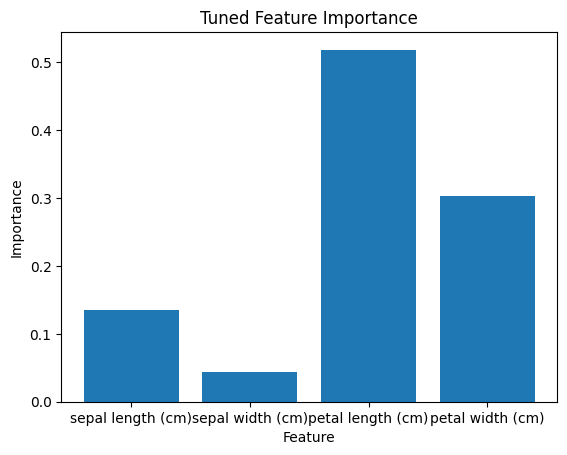

In [10]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best Random Forest model
best_rf = grid_search_rf.best_estimator_

# Evaluate the tuned Random Forest
y_pred_tuned_rf = best_rf.predict(X_test_scaled)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
report_tuned_rf = classification_report(y_test, y_pred_tuned_rf)

print("\nTuned Random Forest Test Set Evaluation:")
print(f"Accuracy: {accuracy_tuned_rf:.4f}")
print("Classification Report:\n", report_tuned_rf)

# Feature Importance after tuning.
feature_importance_tuned = best_rf.feature_importances_
plt.figure()
plt.bar(iris.feature_names, feature_importance_tuned)
plt.title("Tuned Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

### 5. Practical Considerations and Best Practices

**5.1 Computational Cost**

Ensemble methods, especially when tuned, can be computationally expensive. Consider using techniques like Random Search or Bayesian Optimization to reduce the search space.

**5.2 Data Preprocessing**

Ensemble methods are generally robust to outliers and noisy data, but proper data preprocessing can still improve their performance.

**5.3 Model Interpretability**

While ensemble methods can be complex, techniques like feature importance and partial dependence plots can help in understanding their behavior.

**5.4 Model Selection and Ensemble Methods: A Combined Approach**

Often, the best approach is to combine model selection and ensemble methods. Start by comparing different models, then tune the best-performing model using an ensemble technique.

**5.5 Handling Imbalanced Datasets**

Ensemble methods can be effective for imbalanced datasets, but techniques like oversampling, undersampling, or using class weights can further improve performance.

**5.6 Regularization**

In ensemble methods like Gradient Boosting, regularization techniques (e.g., controlling tree depth, learning rate) can help prevent overfitting.

**5.7 Validation and Testing**

Always use cross-validation during training and hyperparameter tuning, and evaluate the final model on a separate test set to ensure generalization.

**5.8 Domain Knowledge**

Domain knowledge can be invaluable in guiding the model selection and hyperparameter tuning process.

**5.9 Monitoring and Maintenance**

Once a model is deployed, it's essential to monitor its performance and retrain it periodically to adapt to changes in the data.

### 6. Advanced Ensemble Techniques and Considerations

**6.1 Voting Ensembles: Simple and Effective**

Voting ensembles are among the simplest ensemble techniques. They involve creating multiple base models and combining their predictions through a voting mechanism (e.g., majority voting for classification, averaging for regression).

* **Hard Voting:** Each model gets one vote, and the class with the most votes is predicted.
* **Soft Voting:** Each model provides a probability for each class, and the class with the highest average probability is predicted.

**6.2 Blending: A Simplified Stacking Approach**

Blending is similar to stacking but uses a simpler approach. Instead of using cross-validation to generate predictions for the meta-learner, it splits the training data into two parts: one for training the base models and the other for training the meta-learner.

**6.3 Out-of-Bag (OOB) Evaluation**

For bagging methods like Random Forests, OOB evaluation provides an estimate of the model's performance without the need for a separate validation set. OOB samples are those that were not included in the bootstrap sample used to train a particular tree.

**6.4 Feature Engineering with Ensembles**

Ensemble methods can be used for feature engineering. For example, the predictions of base models can be used as new features for a meta-learner in a stacking ensemble.

**6.5 Model Diversity**

The effectiveness of ensemble methods relies on the diversity of the base models. Techniques like using different algorithms, different feature subsets, or different training data subsets can increase model diversity.

**6.6 Handling Large Datasets**

For large datasets, ensemble methods can be computationally expensive. Techniques like distributed computing, parallel processing, or using more efficient implementations (e.g., XGBoost, LightGBM) can help.

**6.7 Real-Time Applications**

For real-time applications, the prediction speed of ensemble methods can be a concern. Techniques like model distillation (training a simpler model to mimic the ensemble) can help to improve prediction speed.

**6.8 Case Studies and Practical Examples**

Incorporating real-world case studies and practical examples can help to illustrate the application of ensemble methods and model selection techniques.

**6.9 Ensemble Methods in Deep Learning**

Ensemble methods are also applicable to deep learning. Techniques like snapshot ensembles (training a single neural network with different learning rates) or using multiple random initializations can improve deep learning model performance.

**6.10 Ethical Considerations**

It's essential to consider the ethical implications of using complex models like ensembles. Ensure that the models are fair, transparent, and do not perpetuate biases.

### 7. Troubleshooting and Debugging Ensemble Models

**7.1 Overfitting and Underfitting Diagnostics**

* **Learning Curves:** Plotting training and validation scores as a function of training set size can help diagnose overfitting and underfitting.
* **Validation Curves:** Plotting training and validation scores as a function of a hyperparameter can help identify optimal hyperparameter values.

**7.2 Model Complexity and Regularization Issues**

* If the model is overfitting, consider reducing model complexity (e.g., reducing tree depth in Random Forests or Gradient Boosting) or increasing regularization.
* If the model is underfitting, consider increasing model complexity or decreasing regularization.

**7.3 Feature Importance and Feature Interactions**

* Analyze feature importance scores to identify irrelevant or redundant features.
* Use partial dependence plots to visualize the effect of individual features on the model's predictions.
* Consider feature interaction plots to understand how pairs of features affect predictions.

**7.4 Performance Discrepancies Between Training and Test Sets**

* Large discrepancies between training and test set performance can indicate overfitting.
* Ensure that cross-validation is used properly to avoid data leakage.
* Verify that the test set is representative of the real-world data.

**7.5 Debugging Stacking Models**

* Inspect the performance of the base models and the meta-learner separately.
* Visualize the predictions of the base models and the meta-learner to identify patterns.
* Ensure that the meta-learner is not overfitting to the base model predictions.

**7.6 Handling Computational Resource Constraints**

* Use techniques like feature selection or dimensionality reduction to reduce the input data size.
* Consider using more efficient implementations of ensemble algorithms (e.g., XGBoost, LightGBM).
* Explore distributed computing or cloud-based solutions for large datasets.

**7.7 Dealing with Imbalanced Datasets in Ensembles**

* Use techniques like oversampling, undersampling, or class weighting.
* Evaluate the model using appropriate metrics (e.g., precision, recall, F1-score, ROC-AUC).
* Consider using ensemble methods specifically designed for imbalanced data (e.g., EasyEnsemble, BalanceCascade).

**7.8 Monitoring Model Performance in Production**

* Implement robust monitoring systems to track model performance over time.
* Set up alerts for performance degradation or concept drift.
* Retrain the model periodically to adapt to changes in the data.

**7.9 Version Control and Reproducibility**

* Use version control systems (e.g., Git) to track code and model changes.
* Document all steps in the model development process to ensure reproducibility.
* Set random seeds to ensure consistent results.

**7.10 Continuous Learning and Improvement**

* Stay up-to-date with the latest research and best practices in ensemble methods.
* Experiment with different techniques and approaches to optimize model performance.
* Continuously evaluate and improve the model based on feedback and new data.

### 8. Advanced Topics and Future Directions in Ensemble Learning

**8.1 Deep Ensemble Methods**

* **Snapshot Ensembles:** Training a single neural network with different learning rates to obtain multiple models.
* **Deep Stacking:** Using neural networks as meta-learners in stacking ensembles.
* **Bayesian Deep Learning Ensembles:** Combining Bayesian neural networks to capture uncertainty.

**8.2 AutoML and Ensemble Learning**

* **Automated Feature Engineering:** Using AutoML tools to generate diverse feature sets for ensemble models.
* **Automated Hyperparameter Tuning:** Integrating AutoML tools to optimize ensemble hyperparameters.
* **Neural Architecture Search (NAS) Ensembles:** Combining different neural network architectures found by NAS.

**8.3 Ensemble Learning for Time Series Data**

* **Time Series Feature Engineering for Ensembles:** Generating time-lagged features and other time-related features.
* **Ensemble Methods for Time Series Forecasting:** Combining predictions from multiple time series models.
* **Handling Non-Stationarity in Time Series Ensembles:** Adaptive ensemble techniques that adjust to changes in the data distribution.

**8.4 Ensemble Learning for Natural Language Processing (NLP)**

* **Transformer Ensembles:** Combining predictions from multiple transformer models.
* **Ensemble Methods for Text Classification and Sentiment Analysis:** Leveraging diverse NLP models for improved performance.
* **Handling Contextual Information in NLP Ensembles:** Incorporating contextual information and knowledge graphs.

**8.5 Ensemble Learning for Computer Vision**

* **Convolutional Neural Network (CNN) Ensembles:** Combining predictions from multiple CNN models.
* **Ensemble Methods for Object Detection and Image Segmentation:** Leveraging diverse CV models for improved performance.
* **Handling Spatial Dependencies in CV Ensembles:** Incorporating spatial information and attention mechanisms.

**8.6 Ensemble Learning for Reinforcement Learning (RL)**

* **Ensemble Methods for Policy Optimization:** Combining multiple RL agents for improved exploration and exploitation.
* **Ensemble Methods for Value Function Approximation:** Reducing variance and improving stability in value function estimation.
* **Handling Uncertainty in RL Ensembles:** Capturing uncertainty and improving robustness in RL tasks.

**8.7 Federated Learning and Ensemble Methods**

* **Federated Averaging and Ensemble Techniques:** Combining models trained on decentralized data.
* **Handling Data Heterogeneity in Federated Ensembles:** Adaptive ensemble techniques for diverse data distributions.
* **Privacy-Preserving Ensemble Learning:** Combining ensemble methods with differential privacy and other privacy-preserving techniques.

**8.8 Explainable AI (XAI) and Ensemble Methods**

* **Explainable Ensemble Predictions:** Techniques for explaining the predictions of complex ensemble models.
* **Feature Importance and Partial Dependence Plots for Ensembles:** Extending XAI techniques to ensemble models.
* **Building Transparent and Trustworthy Ensemble Systems:** Incorporating XAI techniques to improve model transparency and trust.

**8.9 Ethical Considerations in Advanced Ensemble Techniques**

* **Bias and Fairness in Ensemble Models:** Ensuring that ensemble models do not perpetuate biases.
* **Transparency and Accountability:** Making complex ensemble models more transparent and accountable.
* **Responsible AI Practices:** Developing and deploying ensemble models responsibly.

**8.10 The Future of Ensemble Learning**

* **Automated Ensemble Learning:** Developing tools and techniques for automating the ensemble learning process.
* **Adaptive Ensemble Methods:** Creating ensemble methods that can adapt to changes in the data distribution.
* **Hybrid Ensemble Techniques:** Combining ensemble methods with other machine learning paradigms (e.g., deep learning, reinforcement learning).

## Model Selection & Ensemble Learning: Advanced Techniques (Part 2)

### 1. Model Selection: Finding the Optimal Fit (Expanded)

**1.1 Multiple Datasets and Diverse Models**

We'll use the Breast Cancer Wisconsin dataset to demonstrate model selection on a different dataset with varying characteristics. We'll also include KNN, SVMs with different kernels, and Naive Bayes classifiers.

```python
import numpy as np
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load datasets
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

# Add noise to iris features
noise = np.random.normal(0, 0.5, X_iris.shape)
X_iris_noisy = X_iris + noise

# Split datasets
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris_noisy, y_iris, test_size=0.2, random_state=42)
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# Scale datasets
scaler_iris = StandardScaler()
X_iris_train_scaled = scaler_iris.fit_transform(X_iris_train)
X_iris_test_scaled = scaler_iris.transform(X_iris_test)

scaler_cancer = StandardScaler()
X_cancer_train_scaled = scaler_cancer.fit_transform(X_cancer_train)
X_cancer_test_scaled = scaler_cancer.transform(X_cancer_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (Linear)": SVC(kernel='linear', random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Evaluate models on Iris
print("\nIris Dataset Model Evaluation:")
results_iris = {}
for name, model in models.items():
    scores = cross_val_score(model, X_iris_train_scaled, y_iris_train, cv=5, scoring="accuracy")
    results_iris[name] = scores
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")

# Evaluate models on Breast Cancer
print("\nBreast Cancer Dataset Model Evaluation:")
results_cancer = {}
for name, model in models.items():
    scores = cross_val_score(model, X_cancer_train_scaled, y_cancer_train, cv=5, scoring="accuracy")
    results_cancer[name] = scores
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load datasets
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

# Add noise to iris features
noise = np.random.normal(0, 0.5, X_iris.shape)
X_iris_noisy = X_iris + noise

# Split datasets
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris_noisy, y_iris, test_size=0.2, random_state=42)
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# Scale datasets
scaler_iris = StandardScaler()
X_iris_train_scaled = scaler_iris.fit_transform(X_iris_train)
X_iris_test_scaled = scaler_iris.transform(X_iris_test)

scaler_cancer = StandardScaler()
X_cancer_train_scaled = scaler_cancer.fit_transform(X_cancer_train)
X_cancer_test_scaled = scaler_cancer.transform(X_cancer_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (Linear)": SVC(kernel='linear', random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability = True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Evaluate models on Iris
print("\nIris Dataset Model Evaluation:")
results_iris = {}
for name, model in models.items():
    scores = cross_val_score(model, X_iris_train_scaled, y_iris_train, cv=5, scoring="accuracy")
    results_iris[name] = scores
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")

# Evaluate models on Breast Cancer
print("\nBreast Cancer Dataset Model Evaluation:")
results_cancer = {}
for name, model in models.items():
    scores = cross_val_score(model, X_cancer_train_scaled, y_cancer_train, cv=5, scoring="accuracy")
    results_cancer[name] = scores
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")


Iris Dataset Model Evaluation:
Logistic Regression: Mean Accuracy = 0.8667, Std Dev = 0.0612
Decision Tree: Mean Accuracy = 0.8250, Std Dev = 0.0312
Random Forest: Mean Accuracy = 0.8583, Std Dev = 0.0858
SVM (Linear): Mean Accuracy = 0.8667, Std Dev = 0.0612
SVM (RBF): Mean Accuracy = 0.8750, Std Dev = 0.0913
KNN: Mean Accuracy = 0.8667, Std Dev = 0.0612
Naive Bayes: Mean Accuracy = 0.8500, Std Dev = 0.0935

Breast Cancer Dataset Model Evaluation:
Logistic Regression: Mean Accuracy = 0.9736, Std Dev = 0.0179
Decision Tree: Mean Accuracy = 0.9165, Std Dev = 0.0179
Random Forest: Mean Accuracy = 0.9582, Std Dev = 0.0176
SVM (Linear): Mean Accuracy = 0.9692, Std Dev = 0.0146
SVM (RBF): Mean Accuracy = 0.9758, Std Dev = 0.0128
KNN: Mean Accuracy = 0.9604, Std Dev = 0.0215
Naive Bayes: Mean Accuracy = 0.9341, Std Dev = 0.0209


**1.2 Custom Evaluation Metrics and Visualizations**

We'll use precision, recall, F1-score, and ROC-AUC for the Breast Cancer dataset (binary classification) and visualize the results.

```python
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

best_cancer_model_name = max(results_cancer, key=lambda k: np.mean(results_cancer[k]))
best_cancer_model = models[best_cancer_model_name]
best_cancer_model.fit(X_cancer_train_scaled, y_cancer_train)
y_cancer_pred = best_cancer_model.predict(X_cancer_test_scaled)

precision = precision_score(y_cancer_test, y_cancer_pred)
recall = recall_score(y_cancer_test, y_cancer_pred)
f1 = f1_score(y_cancer_test, y_cancer_pred)
auc_roc = roc_auc_score(y_cancer_test, best_cancer_model.predict_proba(X_cancer_test_scaled)[:, 1])

print(f"\nBest Model for Breast Cancer: {best_cancer_model_name}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, AUC-ROC: {auc_roc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_cancer_test, best_cancer_model.predict_proba(X_cancer_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Breast Cancer)")
plt.legend()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_cancer_test, y_cancer_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix (Breast Cancer)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Best Model for Breast Cancer: SVM (RBF)
Precision: 0.9726, Recall: 1.0000, F1-score: 0.9861, AUC-ROC: 0.9974


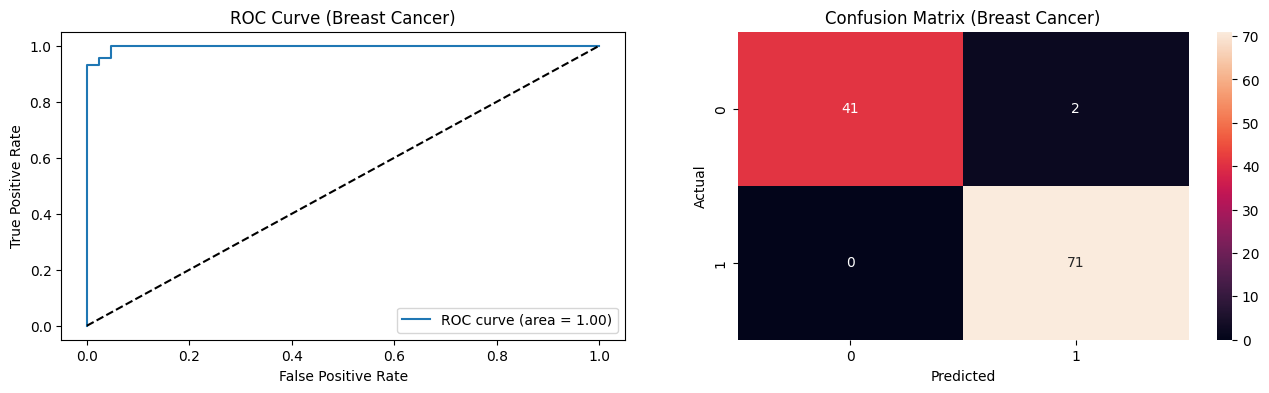

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

best_cancer_model_name = max(results_cancer, key=lambda k: np.mean(results_cancer[k]))
best_cancer_model = models[best_cancer_model_name]
best_cancer_model.fit(X_cancer_train_scaled, y_cancer_train)
y_cancer_pred = best_cancer_model.predict(X_cancer_test_scaled)

precision = precision_score(y_cancer_test, y_cancer_pred)
recall = recall_score(y_cancer_test, y_cancer_pred)
f1 = f1_score(y_cancer_test, y_cancer_pred)
auc_roc = roc_auc_score(y_cancer_test, best_cancer_model.predict_proba(X_cancer_test_scaled)[:, 1])

print(f"\nBest Model for Breast Cancer: {best_cancer_model_name}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, AUC-ROC: {auc_roc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_cancer_test, best_cancer_model.predict_proba(X_cancer_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1,2, figsize=(16, 4))


axes[0].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[0].plot([0, 1], [0, 1], "k--")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve (Breast Cancer)")
axes[0].legend()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_cancer_test, y_cancer_pred)
sns.heatmap(cm, annot=True, fmt="d")
axes[1].set_title("Confusion Matrix (Breast Cancer)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

**1.3 Interactive Exercises**

**Exercise 1:**
* Change the `test_size` in the `train_test_split` function and observe how the model performances change.
* Discuss why the performance changes.

**Exercise 2:**
* Try changing the `kernel` parameter of the SVM model to 'poly' and observe the results.
* Discuss when you might choose a polynomial kernel over a linear or RBF kernel.

**Exercise 3:**
* Implement a bar plot to compare the cross-validation scores of the models on the Iris dataset.
* Discuss which model performs best and why.

### 2. Ensemble Methods (Expanded)

**2.1 Detailed Ensemble Implementation and Tuning**

We'll implement Bagging from scratch, fine-tune AdaBoost and Gradient Boosting, and implement stacking with more base models.

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Bagging from scratch
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_scores = cross_val_score(bagging, X_iris_train_scaled, y_iris_train, cv=5, scoring="accuracy")
print(f"\nBagging (Scratch): Mean Accuracy = {np.mean(bagging_scores):.4f}")

# Fine-tune AdaBoost
param_grid_ada = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_iris_train_scaled, y_iris_train)
best_ada = grid_search_ada.best_estimator_
ada_scores_tuned = cross_val_score(best_ada, X_iris_train_scaled, y_iris_train, cv=5, scoring="accuracy")
print(f"AdaBoost (Tuned): Mean Accuracy = {np.mean(ada_scores_tuned):.4f}")

# Fine-tune Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_iris_train_scaled, y_iris_train)
best_gb = grid_search_gb.best_estimator_
gb_scores_tuned = cross_val_score(best_gb, X_iris_train_scaled, y_iris_train, cv=5, scoring="accuracy")
print(f"Gradient Boosting (Tuned): Mean Accuracy = {np.mean(gb_scores_tuned):.4f}")

# Stacking with more base models
from sklearn.ensemble import StackingClassifier
base_models_stacking = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42)),
    ('svm_rbf', SVC(kernel='rbf', random_state=42))
]
meta_learner = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_models_stacking, final_estimator=meta_learner)
stacking_scores = cross_val_score(stacking_model, X_iris_train_scaled, y_iris_train, cv=5, scoring="accuracy")
print(f"Stacking: Mean Accuracy = {np.mean(stacking_scores):.4f}")

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Bagging from scratch
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_scores = cross_val_score(bagging, X_iris_train_scaled, y_iris_train, cv=5, scoring="accuracy")
print(f"\nBagging (Scratch): Mean Accuracy = {np.mean(bagging_scores):.4f}")

# Fine-tune AdaBoost
param_grid_ada = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_iris_train_scaled, y_iris_train)
best_ada = grid_search_ada.best_estimator_
ada_scores_tuned = cross_val_score(best_ada, X_iris_train_scaled, y_iris_train, cv=5, scoring="accuracy")
print(f"AdaBoost (Tuned): Mean Accuracy = {np.mean(ada_scores_tuned):.4f}")

# Fine-tune Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_iris_train_scaled, y_iris_train)
best_gb = grid_search_gb.best_estimator_
gb_scores_tuned = cross_val_score(best_gb, X_iris_train_scaled, y_iris_train, cv=5, scoring="accuracy")
print(f"Gradient Boosting (Tuned): Mean Accuracy = {np.mean(gb_scores_tuned):.4f}")

# Stacking with more base models
from sklearn.ensemble import StackingClassifier
base_models_stacking = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42)),
    ('svm_rbf', SVC(kernel='rbf', random_state=42))
]
meta_learner = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_models_stacking, final_estimator=meta_learner)
stacking_scores = cross_val_score(stacking_model, X_iris_train_scaled, y_iris_train, cv=5, scoring="accuracy")
print(f"Stacking: Mean Accuracy = {np.mean(stacking_scores):.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging (Scratch): Mean Accuracy = 0.8250
AdaBoost (Tuned): Mean Accuracy = 0.8583
Gradient Boosting (Tuned): Mean Accuracy = 0.8667
Stacking: Mean Accuracy = 0.8500


**2.2 Feature Importance Analysis**

We'll demonstrate how to extract and visualize feature importance from Random Forests and Gradient Boosting.

```python
import matplotlib.pyplot as plt

# Feature importance for Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_iris_train_scaled, y_iris_train)
feature_importance_rf = rf.feature_importances_
plt.figure()
plt.bar(iris.feature_names, feature_importance_rf)
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Feature importance for Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_iris_train_scaled, y_iris_train)
feature_importance_gb = gb.feature_importances_
plt.figure()
plt.bar(iris.feature_names, feature_importance_gb)
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

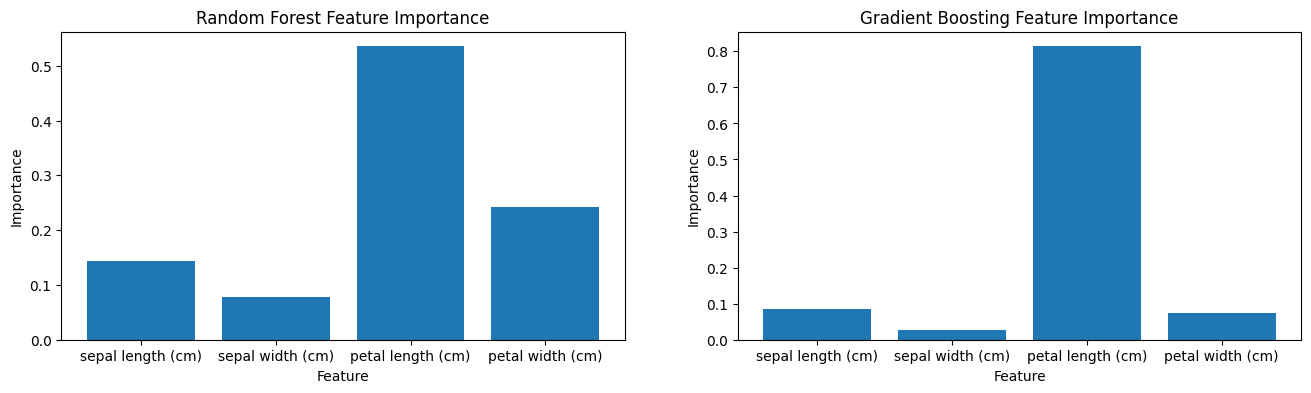

In [27]:
import matplotlib.pyplot as plt

# Feature importance for Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_iris_train_scaled, y_iris_train)
feature_importance_rf = rf.feature_importances_

# Subplots Setup.
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].bar(iris.feature_names, feature_importance_rf)
axes[0].set_title("Random Forest Feature Importance")
axes[0].set_xlabel("Feature")
axes[0].set_ylabel("Importance")

# Feature importance for Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_iris_train_scaled, y_iris_train)
feature_importance_gb = gb.feature_importances_


axes[1].bar(iris.feature_names, feature_importance_gb)
axes[1].set_title("Gradient Boosting Feature Importance")
axes[1].set_xlabel("Feature")
axes[1].set_ylabel("Importance")

plt.show()

**2.3 Interactive Exercises**

**Exercise 4:**
* Change the `n_estimators` parameter in the `BaggingClassifier` and observe the impact on performance.
* Discuss the trade-offs between more estimators and computational cost.

**Exercise 5:**
* Experiment with different meta-learners in the Stacking model (e.g., Decision Tree, SVM).
* Discuss how the choice of meta-learner affects the stacking performance.

**Exercise 6:**
* Implement a function that calculates the average feature importance from both Random Forest and Gradient Boosting.
* Discuss which features are consistently important across both models.